In [1]:
from MLJEC_MCTruth_Model import *
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from plotterUtils import *

Using TensorFlow backend.


In [2]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['CUDA_VISIBLE_DEVICES']='2'

In [3]:
model = loadModel('model_eta_dense_pt_dense_updatedJuly14')

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 30, 30, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 30, 30, 20)    2440        input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 30, 30, 20)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 15, 15, 20)    0           activation_1[0][0]               
___________________________________________________________________________________________

In [5]:
df = pd.read_pickle('new_ak5.pkl')

In [6]:
scaler = StandardScaler()
df['jet_eta_scaled'] = df['jet_eta'] / 2.5
df['jet_pt_exp'] = map(np.log,df['jet_pt'])
df['jet_pt_scaled'] = scaler.fit_transform(df['jet_pt_exp'].reshape(-1, 1))
df.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,event,run,lumi,ak5pfcand_ijet,ak5pfcand_eta,ak5pfcand_phi,ak5pfcand_pt,ak5pfcand_charge,ak5pfcand_id,met,...,jet_charHad_mult,jet_neutHad_mult,jet_photon_frac,jet_electron_frac,jet_muon_frac,jet_charHad_frac,jet_neutHad_frac,jet_eta_scaled,jet_pt_exp,jet_pt_scaled
0,10924,1,34,0,"[0.0937823355198, 0.151686325669, 0.1574396342...","[0.121016122401, 0.112178370357, 0.11617858707...","[26.3627071381, 23.2924747467, 22.8187427521, ...","[0, 1, 1, 1, 1, -1, 0, 0, 1, 0, -1, 0, 0, 1, 1...","[22, 211, 211, 211, 211, 211, 22, 22, 211, 22,...",45.550011,...,14,0,0.324214,0.0,0.0,0.679216,0.000000,0.063610,4.799769,1.910050
1,10924,1,34,1,"[1.20964205265, 1.26480460167, 1.2437223196, 1...","[-3.00284266472, -2.85279870033, -2.9814713001...","[17.674489975, 9.67879009247, 8.6874332428, 6....","[0, 0, -1, -1, 1, -1, 1, 1, 0, -1, -1, 0, -1, ...","[130, 130, 211, 211, 211, 211, 211, 211, 22, 2...",45.550011,...,20,6,0.163687,0.0,0.0,0.508385,0.335986,0.496600,4.519248,1.594222
2,10924,1,34,2,"[1.9744426012, 1.99983370304, 2.29218244553, 2...","[-3.08589291573, -2.91360616684, -2.9873976707...","[7.16022443771, 5.15167379379, 4.85565328598, ...","[0, -1, -1, 1, 1, 1, 1, 0, -1, -1, 1, -1, -1, ...","[22, 211, 211, 211, 211, 211, 211, 22, 211, 21...",45.550011,...,17,0,0.270121,0.0,0.0,0.741411,0.000000,0.836182,3.486587,0.431588
3,10924,1,34,3,"[-2.22832536697, -2.14023470879, -2.3993501663...","[1.22548639774, 1.16641104221, 1.08441221714, ...","[5.09197950363, 2.95773172379, 2.42477655411, ...","[1, 0, 0, -1, 1, 0, 1, -1, 1, 1, -1, 0, 0]","[211, 22, 130, 211, 211, 130, 211, 211, 211, 2...",45.550011,...,8,2,0.210642,0.0,0.0,0.609558,0.196089,-0.893956,2.766777,-0.378818
4,10924,1,34,4,"[-0.246575221419, -0.447122305632, -0.63535857...","[-2.30330061913, -2.40121388435, -2.2405929565...","[8.21415901184, 2.37541675568, 1.26269161701, ...","[-1, -1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]","[211, 211, 22, 211, 22, 22, 22, 211, 211, 22, ...",45.550011,...,5,0,0.250548,0.0,0.0,0.756839,0.000000,-0.131802,2.804864,-0.335937


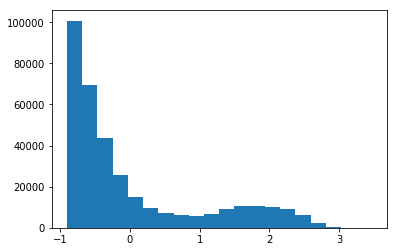

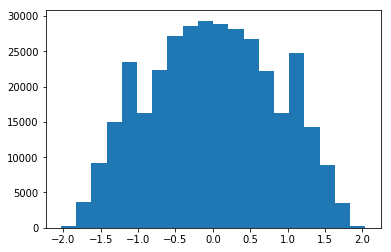

In [7]:
plt.hist(df['jet_pt_scaled'],bins=20)
plt.show()
plt.hist(df['jet_eta_scaled'],bins=20)
plt.show()

In [8]:
jet_image = np.array(map(lambda x : x[0] , df['jet_image']))

In [9]:
inputs = [jet_image.reshape([-1,30,30,1]),np.array(df['jet_pt_scaled']),np.array(df['jet_eta_scaled'])]

In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse','msle'])

In [11]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [12]:
history=model.fit(inputs, np.array(df['jet_jes']), validation_data=(inputs, np.array(df['jet_jes'])), 
                    nb_epoch=1, batch_size=1024, verbose=1, callbacks=[early_stopping])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 349255 samples, validate on 349255 samples
Epoch 1/1
349255/349255 [==============================] - 652s - loss: 0.0484 - acc: 0.0000e+00 - mean_squared_error: 0.0484 - mean_squared_logarithmic_error: 0.0185 - val_loss: 0.0392 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0392 - val_mean_squared_logarithmic_error: 0.0155

In [13]:
val_loss = np.asarray(history.history['val_loss'])
loss = np.asarray(history.history['loss'])
plt.plot(np.log(val_loss), label='test')
plt.plot(np.log(loss), label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
fig = plt.gcf()
fig.draw()
fig.saveas('ak5_training_summary.png',dpi=100)

NameError: name 'history' is not defined

In [ ]:
model_json = model.to_json()
with open("model_eta_dense_pt_dense_updatedSept19.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_eta_dense_pt_dense_updatedSept19.h5")
print("Saved model to disk")

In [ ]:
#df['pred'] = model.predict(inputs)
#df['residual'] = df['pred']-df['jet_jes_ak7']

In [ ]:
#df.to_pickle("new_ak5_withCNN.pkl")